# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Sebastian Pulido Espinoza

- ID: A01642759

- My carreer: IRS


# Importing libraries

In [231]:
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from scipy.optimize import linear_sum_assignment


# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [232]:
df = pd.read_csv("~/escuela/semana_tec_analitica/TC1002S/NotebooksStudents/A01642759/A01642759_X.csv")
df

Unnamed: 0         x1        x2        x3        x4         x5        x6  \
0             0  12.132767  4.501328  8.462204  8.077030  -1.816867  6.566870   
1             1  -1.943570  3.550136  0.176609  9.591460 -11.808733  7.778334   
2             2  -0.839493  3.566774 -3.562090  9.214492  -6.405487  4.540849   
3             3   9.953571  6.460914  3.985459  6.134879   2.772316  4.080371   
4             4  12.936872  4.939548  8.063911  7.110727  -1.113413  3.215831   
..          ...        ...       ...       ...       ...        ...       ...   
796         796  12.977590  6.473366  9.613562  8.082726   2.821339  4.135885   
797         797  -3.452794  1.386642  2.353508  5.930824 -11.135701  4.587984   
798         798  -1.819488 -0.161907  1.001458  9.058265  -8.265414  3.702766   
799         799   8.744941  4.967173  1.897470  5.801033  -6.672071 -4.375641   
800         800  12.193229  5.611494  6.685159  8.477392  -1.368177  5.080424   

            x7        x8         x9        x10       x11        x12        x13  
0     0.674868 -0.618375  -8.258290   2.603710 -3.582615  -2.300676  -8.727290  
1   -10.195801 -2.927516  -1.008432  -1.686166  4.719927  -8.468541   7.926350  
2   -10.389716 -4.428166  -6.270393  -6.061506  4.199406 -10.898136   5.923566  
3     0.398699  4.279971  -5.019056   4.892971 -5.773900  -6.638050 -11.047970  
4     4.664857 -1.557362  -8.454151   4.229846 -3.604510   0.741814  -6.888124  
..         ...       ...        ...        ...       ...        ...        ...  
796   2.728270 -2.578065  -4.619279   5.326422 -2.784176  -4.628065  -7.620305  
797  -6.198756 -0.664235  -4.793020   1.747566 -0.150539 -12.511449  10.760172  
798 -10.656351 -2.282529  -5.443092  -1.260121  0.121609  -9.011053  10.117665  
799   2.642139  3.776361 -10.966073 -11.189994  8.533240   1.916545   2.509403  
800   1.925030  1.357384  -7.967926   5.750628 -6.713017  -5.212984 -11.290815  

[801 rows x 14 columns]

## b) Data managment


Print the first 7 rows

In [233]:
df.head(7)

Unnamed: 0         x1        x2        x3        x4         x5        x6  \
0           0  12.132767  4.501328  8.462204  8.077030  -1.816867  6.566870   
1           1  -1.943570  3.550136  0.176609  9.591460 -11.808733  7.778334   
2           2  -0.839493  3.566774 -3.562090  9.214492  -6.405487  4.540849   
3           3   9.953571  6.460914  3.985459  6.134879   2.772316  4.080371   
4           4  12.936872  4.939548  8.063911  7.110727  -1.113413  3.215831   
5           5   3.432207  6.998316 -0.440417  6.628204  -7.583416 -5.440141   
6           6  11.630017  4.915467  8.119647  6.524806   1.108337  9.600608   

          x7        x8        x9        x10        x11        x12        x13  
0   0.674868 -0.618375 -8.258290   2.603710  -3.582615  -2.300676  -8.727290  
1 -10.195801 -2.927516 -1.008432  -1.686166   4.719927  -8.468541   7.926350  
2 -10.389716 -4.428166 -6.270393  -6.061506   4.199406 -10.898136   5.923566  
3   0.398699  4.279971 -5.019056   4.892971  -5.773900  -6.638050 -11.047970  
4   4.664857 -1.557362 -8.454151   4.229846  -3.604510   0.741814  -6.888124  
5   3.535263 -2.197145 -6.277126 -11.565470  11.425486   0.187241   0.055323  
6  -0.640003 -3.124628 -7.526594   5.808879  -4.335841  -5.758248 -10.268575

Print the last 4 rows

In [234]:
df.tail(4)

Unnamed: 0         x1        x2        x3        x4         x5        x6  \
797         797  -3.452794  1.386642  2.353508  5.930824 -11.135701  4.587984   
798         798  -1.819488 -0.161907  1.001458  9.058265  -8.265414  3.702766   
799         799   8.744941  4.967173  1.897470  5.801033  -6.672071 -4.375641   
800         800  12.193229  5.611494  6.685159  8.477392  -1.368177  5.080424   

            x7        x8         x9        x10       x11        x12        x13  
797  -6.198756 -0.664235  -4.793020   1.747566 -0.150539 -12.511449  10.760172  
798 -10.656351 -2.282529  -5.443092  -1.260121  0.121609  -9.011053  10.117665  
799   2.642139  3.776361 -10.966073 -11.189994  8.533240   1.916545   2.509403  
800   1.925030  1.357384  -7.967926   5.750628 -6.713017  -5.212984 -11.290815

How many rows and columns are in your data?

Use the `shape` method


In [235]:
df.shape

(801, 14)

Print the name of all columns

Use the `columns` method

In [236]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13'],
      dtype='object')

What is the data type in each column

Use the `dtypes` method

In [237]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
x7            float64
x8            float64
x9            float64
x10           float64
x11           float64
x12           float64
x13           float64
dtype: object

What is the meaning of rows and columns?

Your responses here

We have a dataset of 801 rows and 14 columns, where 1 column represents the number of the observation, and the other 13 (x1-x13), represent some kind of float value

Print a statistical summary of your columns


In [238]:
df.describe()

Unnamed: 0          x1          x2          x3          x4          x5  \
count  801.000000  801.000000  801.000000  801.000000  801.000000  801.000000   
mean   400.000000    4.930170    3.772861    3.314798    7.444222   -5.407919   
std    231.373075    4.616228    3.005136    3.657296    2.097544    4.598911   
min      0.000000   -8.079239   -4.285222   -5.202364    0.849736  -17.246818   
25%    200.000000    0.615807    1.572688    0.500757    6.127706   -8.906571   
50%    400.000000    5.865682    3.920130    2.539014    7.406416   -6.604913   
75%    600.000000    8.726455    5.978470    6.399172    8.858083   -1.161026   
max    800.000000   14.471638   11.800004   13.414588   13.701016    6.001402   

               x6          x7          x8          x9         x10         x11  \
count  801.000000  801.000000  801.000000  801.000000  801.000000  801.000000   
mean     2.155991   -0.142437   -1.586647   -6.263021   -2.669141    2.329562   
std      5.088416    6.527653    2.311354    3.177188    6.336727    6.282473   
min     -9.742768  -13.829331   -8.369393  -15.603802  -15.183495  -10.977628   
25%     -3.157429   -7.373146   -3.112755   -8.633057   -8.766942   -3.614465   
50%      4.042516    2.019530   -1.557362   -6.365202   -2.597449    2.062665   
75%      6.073822    5.162818   -0.089367   -3.850488    3.359071    8.516862   
max     12.476463   11.703414    5.498410    2.039979   10.933487   15.206875   

              x12         x13  
count  801.000000  801.000000  
mean    -4.717724   -0.675048  
std      4.466685    7.648273  
min    -16.032355  -15.717802  
25%     -8.573943   -8.465692  
50%     -4.159971   -1.159918  
75%     -0.994835    7.422142  
max      5.493595   15.607871

In [239]:
#1. What is the minumum and maximum values of each variable:
df.describe().iloc[[3, 7],1:]

x1         x2         x3         x4         x5         x6  \
min  -8.079239  -4.285222  -5.202364   0.849736 -17.246818  -9.742768   
max  14.471638  11.800004  13.414588  13.701016   6.001402  12.476463   

            x7        x8         x9        x10        x11        x12  \
min -13.829331 -8.369393 -15.603802 -15.183495 -10.977628 -16.032355   
max  11.703414  5.498410   2.039979  10.933487  15.206875   5.493595   

           x13  
min -15.717802  
max  15.607871

In [240]:
# 2. What is the mean and standar deviation of each variable:
df.describe().iloc[[1,2],1:]

x1        x2        x3        x4        x5        x6        x7  \
mean  4.930170  3.772861  3.314798  7.444222 -5.407919  2.155991 -0.142437   
std   4.616228  3.005136  3.657296  2.097544  4.598911  5.088416  6.527653   

            x8        x9       x10       x11       x12       x13  
mean -1.586647 -6.263021 -2.669141  2.329562 -4.717724 -0.675048  
std   2.311354  3.177188  6.336727  6.282473  4.466685  7.648273

3. What the 25%, 50% and 75% represent?:
The x percentile represents that the x% of the data is below that value. Therefore, the 25/50/75% for x1, represent that the 25/50/70% of data is below 0.615807/5.865682/8.726455, respectively.

Rename the columns using the same name with capital letters

In [241]:
df.columns = df.columns.str.upper()

df.head()

UNNAMED: 0         X1        X2        X3        X4         X5        X6  \
0           0  12.132767  4.501328  8.462204  8.077030  -1.816867  6.566870   
1           1  -1.943570  3.550136  0.176609  9.591460 -11.808733  7.778334   
2           2  -0.839493  3.566774 -3.562090  9.214492  -6.405487  4.540849   
3           3   9.953571  6.460914  3.985459  6.134879   2.772316  4.080371   
4           4  12.936872  4.939548  8.063911  7.110727  -1.113413  3.215831   

          X7        X8        X9       X10       X11        X12        X13  
0   0.674868 -0.618375 -8.258290  2.603710 -3.582615  -2.300676  -8.727290  
1 -10.195801 -2.927516 -1.008432 -1.686166  4.719927  -8.468541   7.926350  
2 -10.389716 -4.428166 -6.270393 -6.061506  4.199406 -10.898136   5.923566  
3   0.398699  4.279971 -5.019056  4.892971 -5.773900  -6.638050 -11.047970  
4   4.664857 -1.557362 -8.454151  4.229846 -3.604510   0.741814  -6.888124

Rename the columns to their original names

In [242]:
df.columns = df.columns.str.lower()
df.head()

unnamed: 0         x1        x2        x3        x4         x5        x6  \
0           0  12.132767  4.501328  8.462204  8.077030  -1.816867  6.566870   
1           1  -1.943570  3.550136  0.176609  9.591460 -11.808733  7.778334   
2           2  -0.839493  3.566774 -3.562090  9.214492  -6.405487  4.540849   
3           3   9.953571  6.460914  3.985459  6.134879   2.772316  4.080371   
4           4  12.936872  4.939548  8.063911  7.110727  -1.113413  3.215831   

          x7        x8        x9       x10       x11        x12        x13  
0   0.674868 -0.618375 -8.258290  2.603710 -3.582615  -2.300676  -8.727290  
1 -10.195801 -2.927516 -1.008432 -1.686166  4.719927  -8.468541   7.926350  
2 -10.389716 -4.428166 -6.270393 -6.061506  4.199406 -10.898136   5.923566  
3   0.398699  4.279971 -5.019056  4.892971 -5.773900  -6.638050 -11.047970  
4   4.664857 -1.557362 -8.454151  4.229846 -3.604510   0.741814  -6.888124

Use two different alternatives to get one of the columns

In [243]:
print(df["x3"])
print(df.iloc[:,3])

0      8.462204
1      0.176609
2     -3.562090
3      3.985459
4      8.063911
         ...   
796    9.613562
797    2.353508
798    1.001458
799    1.897470
800    6.685159
Name: x3, Length: 801, dtype: float64
0      8.462204
1      0.176609
2     -3.562090
3      3.985459
4      8.063911
         ...   
796    9.613562
797    2.353508
798    1.001458
799    1.897470
800    6.685159
Name: x3, Length: 801, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [244]:
df.iloc[62:73,[2,3]]

x2        x3
62  4.022239  1.015072
63  1.510647  0.255103
64  3.304412  9.560946
65 -1.377592  2.949300
66  0.703078  3.886864
67  9.517248 -1.722720
68  2.026054  5.890023
69  6.411903  8.094682
70  5.591120 -1.897951
71  5.518330  3.515189
72  8.150689  2.600382

For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [245]:
print(pd.isnull(df.iloc[:,[2,3]]).sum())
print(pd.notnull(df.iloc[:,[2,3]]).sum())
# 0 + 801 = 801 rows

x2    0
x3    0
dtype: int64
x2    801
x3    801
dtype: int64


Discard the last column


In [246]:
df = df.drop('x13', axis=1)

df.head()

unnamed: 0         x1        x2        x3        x4         x5        x6  \
0           0  12.132767  4.501328  8.462204  8.077030  -1.816867  6.566870   
1           1  -1.943570  3.550136  0.176609  9.591460 -11.808733  7.778334   
2           2  -0.839493  3.566774 -3.562090  9.214492  -6.405487  4.540849   
3           3   9.953571  6.460914  3.985459  6.134879   2.772316  4.080371   
4           4  12.936872  4.939548  8.063911  7.110727  -1.113413  3.215831   

          x7        x8        x9       x10       x11        x12  
0   0.674868 -0.618375 -8.258290  2.603710 -3.582615  -2.300676  
1 -10.195801 -2.927516 -1.008432 -1.686166  4.719927  -8.468541  
2 -10.389716 -4.428166 -6.270393 -6.061506  4.199406 -10.898136  
3   0.398699  4.279971 -5.019056  4.892971 -5.773900  -6.638050  
4   4.664857 -1.557362 -8.454151  4.229846 -3.604510   0.741814

### Questions

Based on the previos results, provide a full description of yout dataset

Your response:
We have a dataset of 801 rows and 14 columns, where 1 column represents the number of the observation, and the other 13 (x1-x13), represent some kind of float value. The values range from -17.246818 to 15.607871



## c) Data visualization

Plot in the histogram of one of the variables

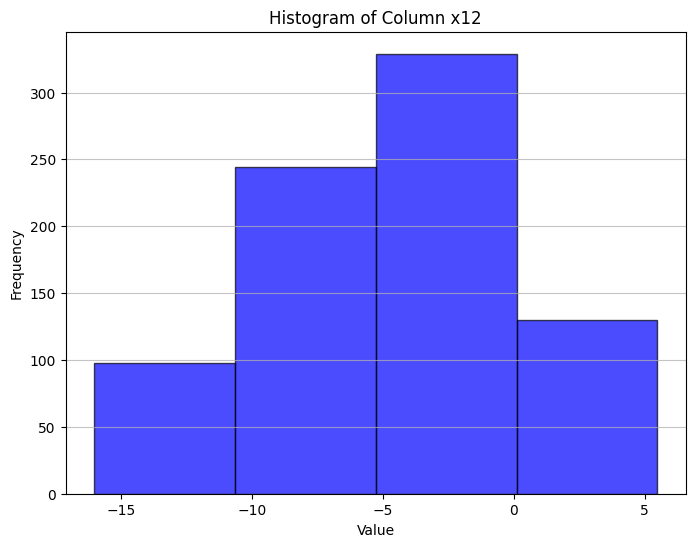

In [247]:
plt.figure(figsize=(8, 6))  
plt.hist(df['x12'], bins=4, color='blue', alpha=0.7, edgecolor='black') 
plt.title('Histogram of Column x12')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75) 
plt.show()

Plot in the same figure the histogram of two variables



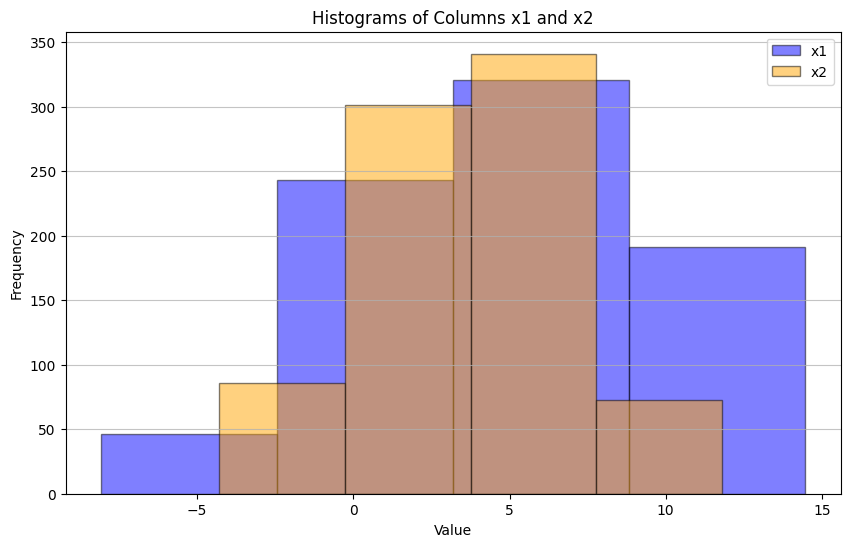

In [248]:
plt.figure(figsize=(10, 6))

# Histogram for column 'x1'
plt.hist(df['x1'], bins=4, color='blue', alpha=0.5, label='x1', edgecolor='black')

# Histogram for column 'x2'
plt.hist(df['x2'], bins=4, color='orange', alpha=0.5, label='x2', edgecolor='black')

plt.title('Histograms of Columns x1 and x2')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

Based on these plots, provide a description of your data:

Your response here:
We can say that x1 has a larger range of values than x2

Plot the boxplot of one of the variables

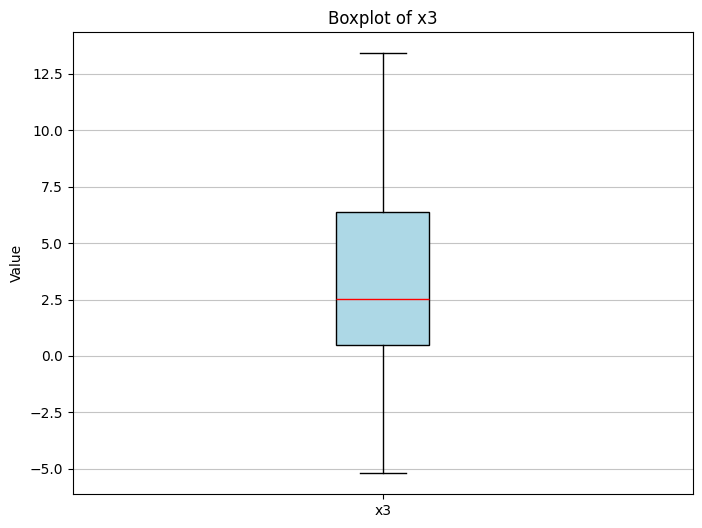

In [249]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['x3'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'), whiskerprops=dict(color='black'), capprops=dict(color='black'),tick_labels=["x3"])

# Add title and labels
plt.title('Boxplot of x3')
plt.ylabel('Value')

plt.grid(axis='y', alpha=0.75)
plt.show()

Plot in the same figure the boxplot of two variables

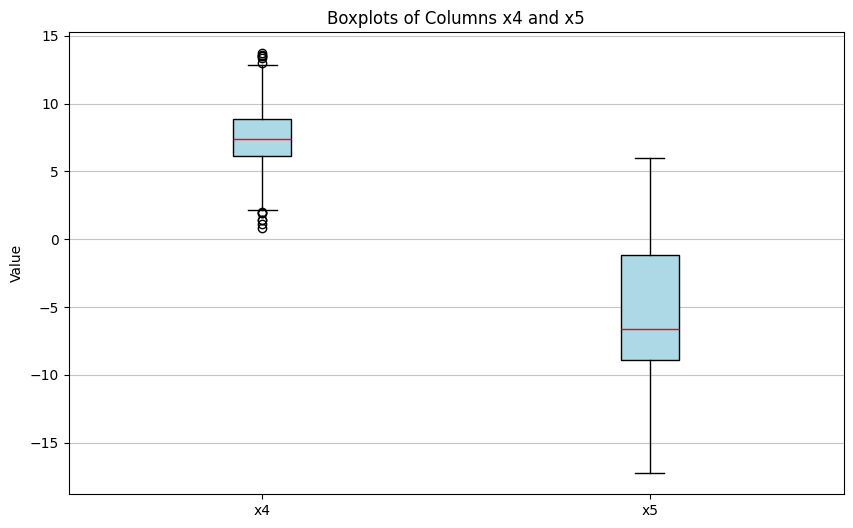

In [250]:

plt.figure(figsize=(10, 6))

# Create boxplots
plt.boxplot([df['x4'], df['x5']], 
            patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'), 
            whiskerprops=dict(color='black'), 
            capprops=dict(color='black'),
            tick_labels=['x4', 'x5'])  # Set labels for the x-axis


plt.title('Boxplots of Columns x4 and x5')
plt.ylabel('Value')

plt.grid(axis='y', alpha=0.75)
plt.show()

Based on these plots, provide a description of your data:

Your response here:
We can see that x4 has outliers, while x5 doesn't.

Plot the scatter plot between all pair of variables

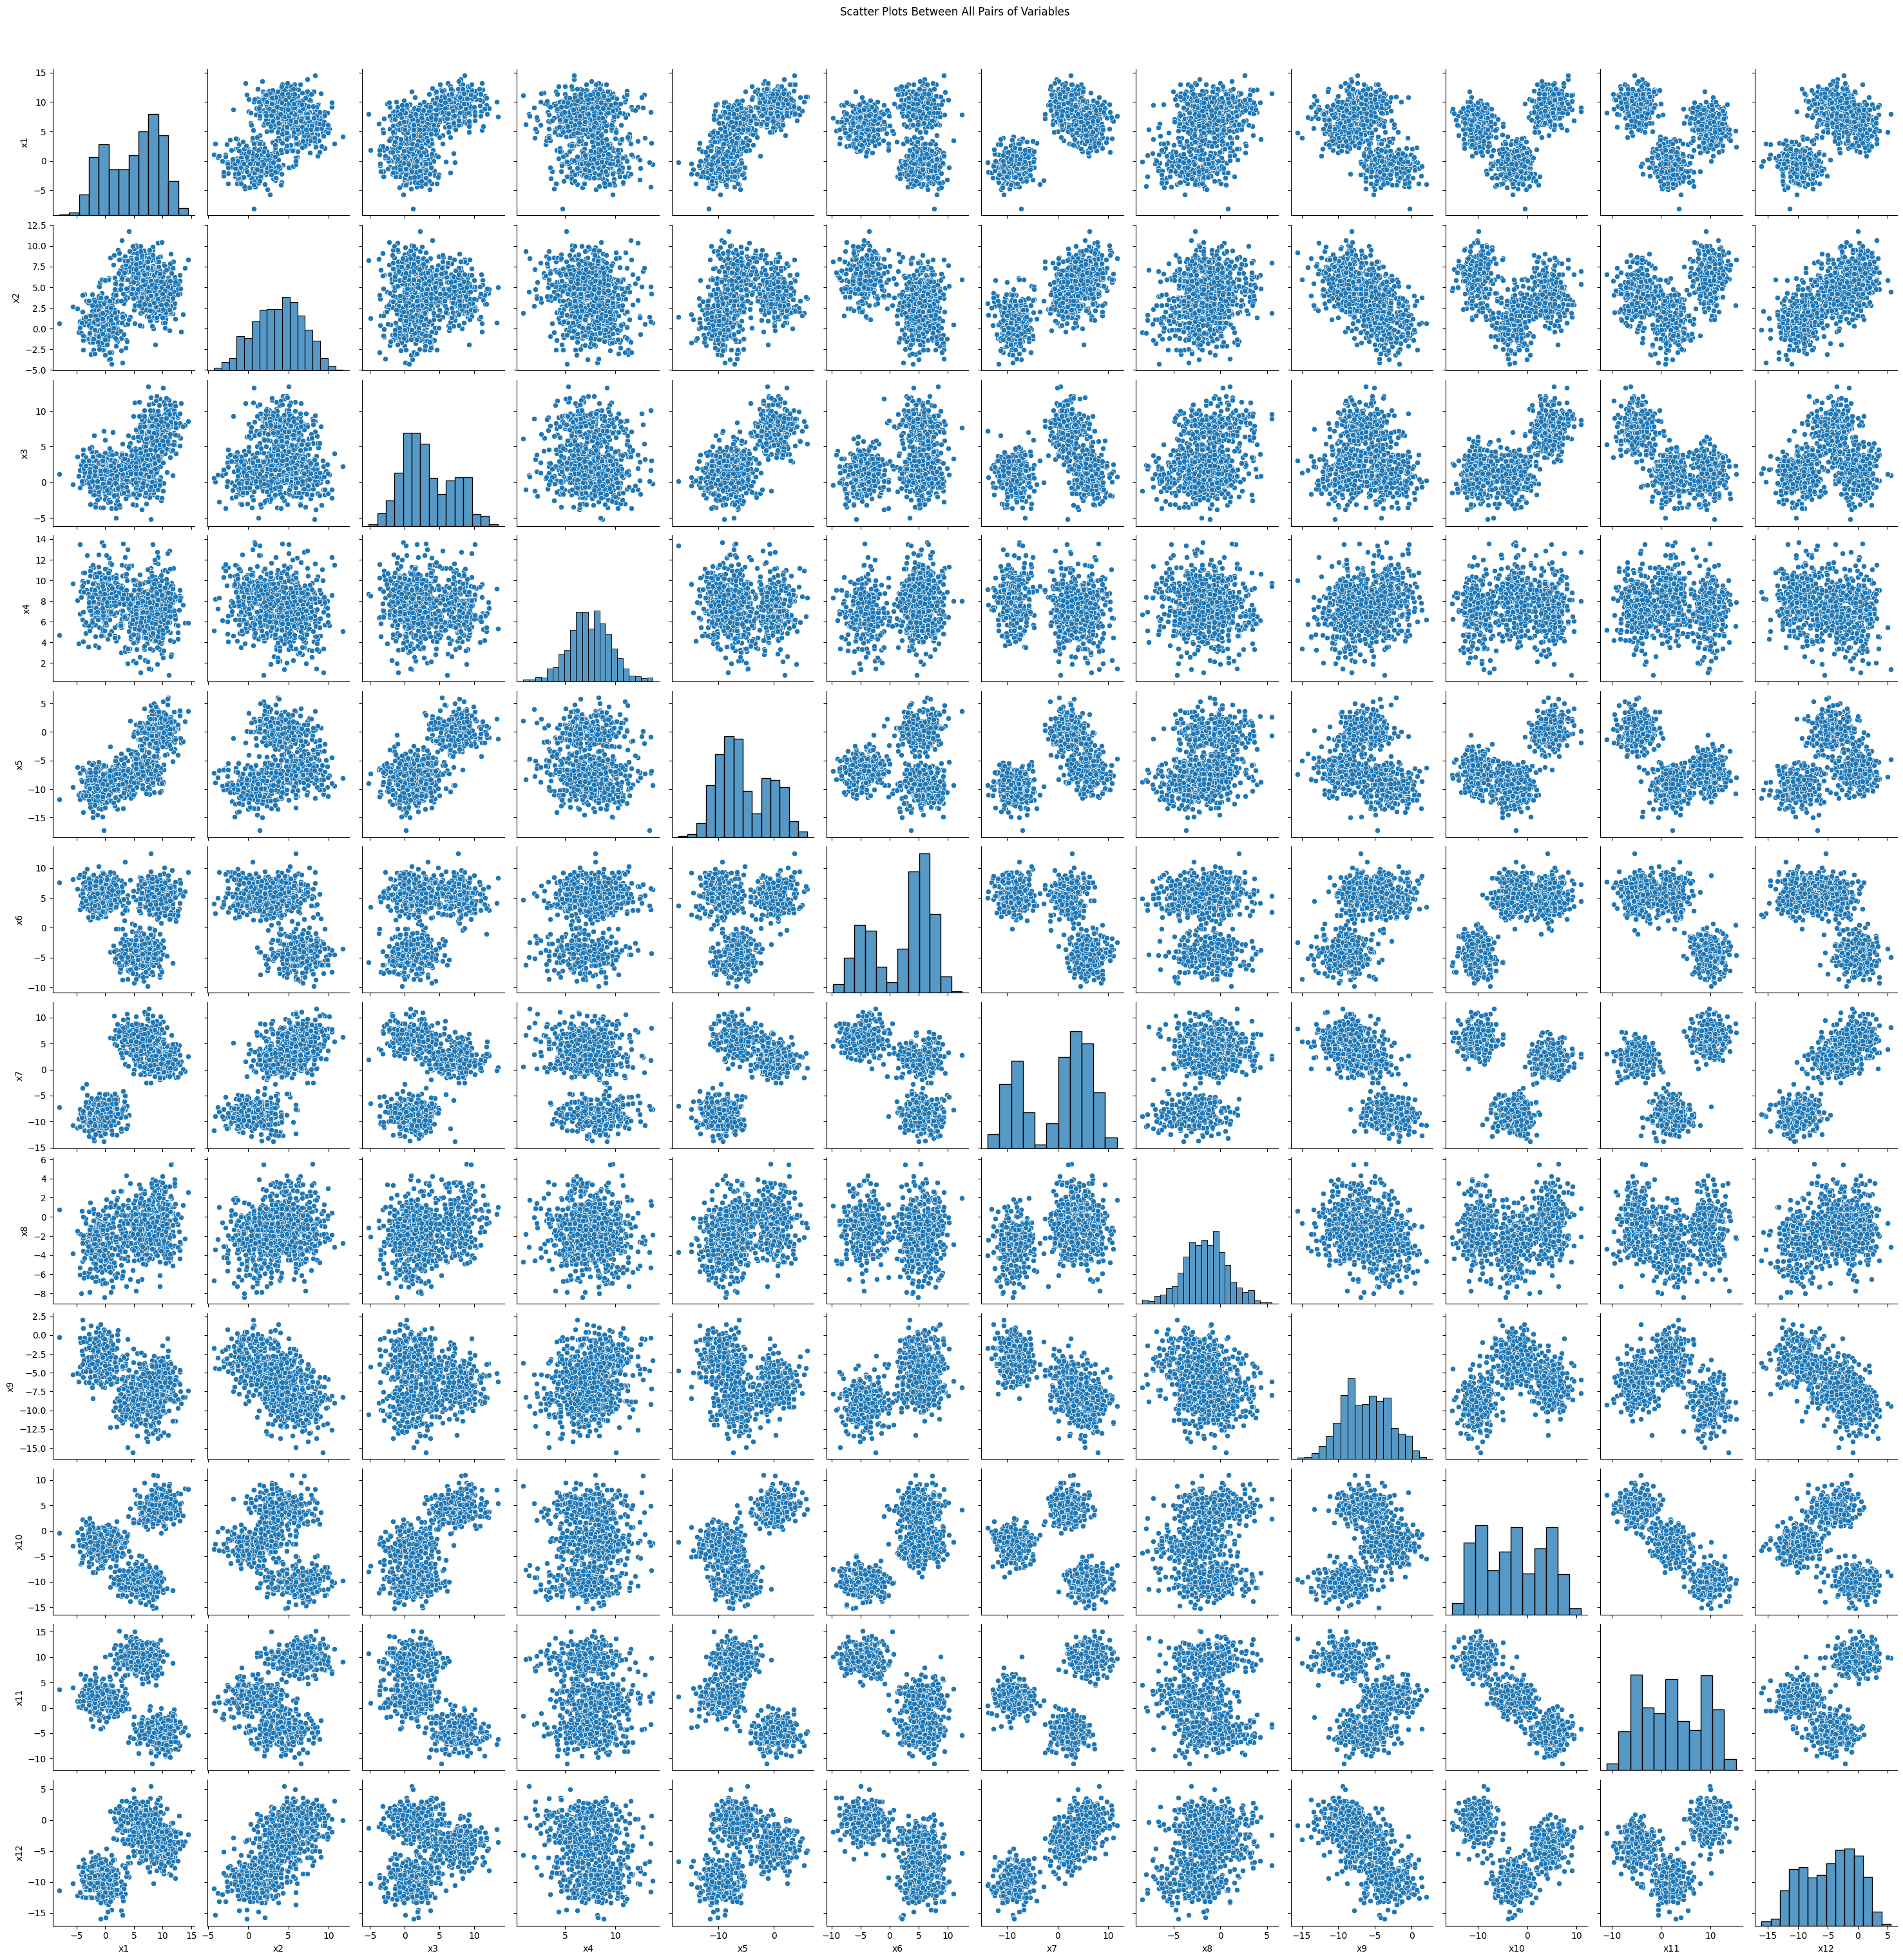

In [251]:
sns.pairplot(df.iloc[:,1:]) # excluding the "unnamed" column

# Show the plot
plt.suptitle('Scatter Plots Between All Pairs of Variables', y=1.02)  
plt.show()

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response:
In several scatterplots we can see 3 clear clusters, like in the scatterplot between x10 and x7.



## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [252]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df.iloc[:,1:])

Add to your dataset a column with the estimated cluster to each data point

In [253]:
df.head()

unnamed: 0         x1        x2        x3        x4         x5        x6  \
0           0  12.132767  4.501328  8.462204  8.077030  -1.816867  6.566870   
1           1  -1.943570  3.550136  0.176609  9.591460 -11.808733  7.778334   
2           2  -0.839493  3.566774 -3.562090  9.214492  -6.405487  4.540849   
3           3   9.953571  6.460914  3.985459  6.134879   2.772316  4.080371   
4           4  12.936872  4.939548  8.063911  7.110727  -1.113413  3.215831   

          x7        x8        x9       x10       x11        x12  Cluster  
0   0.674868 -0.618375 -8.258290  2.603710 -3.582615  -2.300676        0  
1 -10.195801 -2.927516 -1.008432 -1.686166  4.719927  -8.468541        2  
2 -10.389716 -4.428166 -6.270393 -6.061506  4.199406 -10.898136        2  
3   0.398699  4.279971 -5.019056  4.892971 -5.773900  -6.638050        0  
4   4.664857 -1.557362 -8.454151  4.229846 -3.604510   0.741814        0

Print the number associated to each cluster

In [254]:
df["Cluster"].unique()

array([0, 2, 1], dtype=int32)

Print the centroids

In [255]:
kmeans.cluster_centers_

array([[  9.3632498 ,   4.21516621,   7.64300365,   7.24999691,
          0.21479663,   5.4265026 ,   2.05483128,  -0.73932489,
         -6.55081082,   4.71817395,  -4.83440071,  -4.10325523],
       [  6.05738658,   6.28504403,   1.25249535,   6.90693102,
         -6.83782872,  -4.46904656,   6.14953358,  -1.17570723,
         -9.15490384, -10.0253433 ,   9.77551492,  -0.15422393],
       [ -0.63012499,   0.81837171,   1.04889564,   8.17573742,
         -9.60072506,   5.51051803,  -8.63167554,  -2.84490851,
         -3.08334807,  -2.70025412,   2.04757206,  -9.89569338]])

Print the intertia metric

In [256]:
kmeans.inertia_

38234.342431792276

In [257]:
df.head()

unnamed: 0         x1        x2        x3        x4         x5        x6  \
0           0  12.132767  4.501328  8.462204  8.077030  -1.816867  6.566870   
1           1  -1.943570  3.550136  0.176609  9.591460 -11.808733  7.778334   
2           2  -0.839493  3.566774 -3.562090  9.214492  -6.405487  4.540849   
3           3   9.953571  6.460914  3.985459  6.134879   2.772316  4.080371   
4           4  12.936872  4.939548  8.063911  7.110727  -1.113413  3.215831   

          x7        x8        x9       x10       x11        x12  Cluster  
0   0.674868 -0.618375 -8.258290  2.603710 -3.582615  -2.300676        0  
1 -10.195801 -2.927516 -1.008432 -1.686166  4.719927  -8.468541        2  
2 -10.389716 -4.428166 -6.270393 -6.061506  4.199406 -10.898136        2  
3   0.398699  4.279971 -5.019056  4.892971 -5.773900  -6.638050        0  
4   4.664857 -1.557362 -8.454151  4.229846 -3.604510   0.741814        0

Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

/home/sebastian_pulido/.local/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


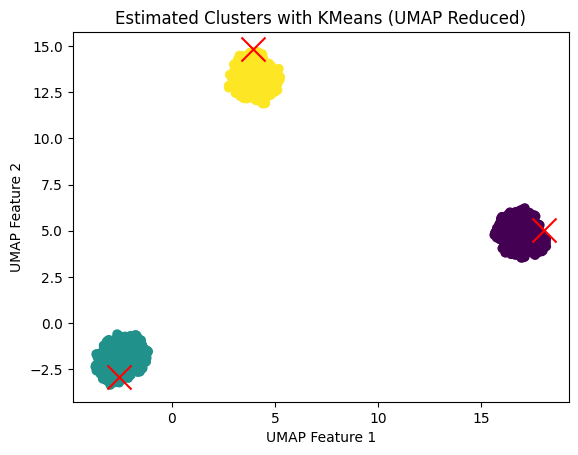

In [258]:
import umap
umap_reducer = umap.UMAP(n_components=2, random_state=0)
X_umap = umap_reducer.fit_transform(df.iloc[:,1:13])

# Plotting
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df["Cluster"], cmap='viridis', marker='o')  # Plot data points colored by cluster
plt.scatter(umap_reducer.transform(kmeans.cluster_centers_)[:, 0], 
            umap_reducer.transform(kmeans.cluster_centers_)[:, 1], 
            s=300, c='red', marker='x')  # Plot centroids
plt.title("Estimated Clusters with KMeans (UMAP Reduced)")
plt.xlabel("UMAP Feature 1")
plt.ylabel("UMAP Feature 2")
plt.show()

### Questions

Provides a detailed description of your results

Your response: According to the plot, there are actually 3 clusters in the data.

## d) Elbow plot

Compute the Elbow plot

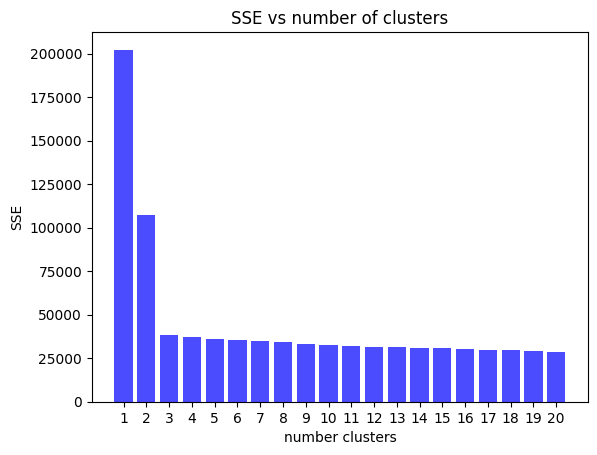

In [259]:
# Intialize a list to hold sum of squared error (sse)
sse_k = []
# Define values of k
k = [x for x in range(1,21)]

# For each k
for i in k:
    kmeans_k = KMeans(n_clusters=i, random_state=42)
    kmeans_k.fit(df.iloc[:,1:13])
    sse = kmeans_k.inertia_
    sse_k.append(sse)
# Plot sse versus k
plt.bar(k, sse_k, color='blue', alpha=0.7)


plt.title('SSE vs number of clusters')
plt.xlabel('number clusters')
plt.ylabel('SSE')
plt.xticks(k)
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response:
The best number of clusters is 3, because after k=3, the decrease in sse is verly low compared to the decrease from k=2 to k=3

Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:
Yes, it does. I guessed that k=3 would be a good fit due to the scatter plot


# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [260]:
from sklearn.datasets import load_digits

digits = load_digits()
# Extract the data and labels
data = digits.data
labels = digits.target

print(f'Data shape: {data.shape}')
print(f'Labels shape: {labels.shape}')
print(data[0])
# 'data' IS A FLATENED VERSION OF AN IMAGE IN THE DATA SET
# EACH ELEMENT IS AN ARRAY OF SIZE 64, REPRESENITING THE PIXELS.
# THERE ARE 1797 IMAGES IN THE DATASET


Data shape: (1797, 64)
Labels shape: (1797,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


2) Plot some of the observations (add in the title the label/digit of that obserbation)

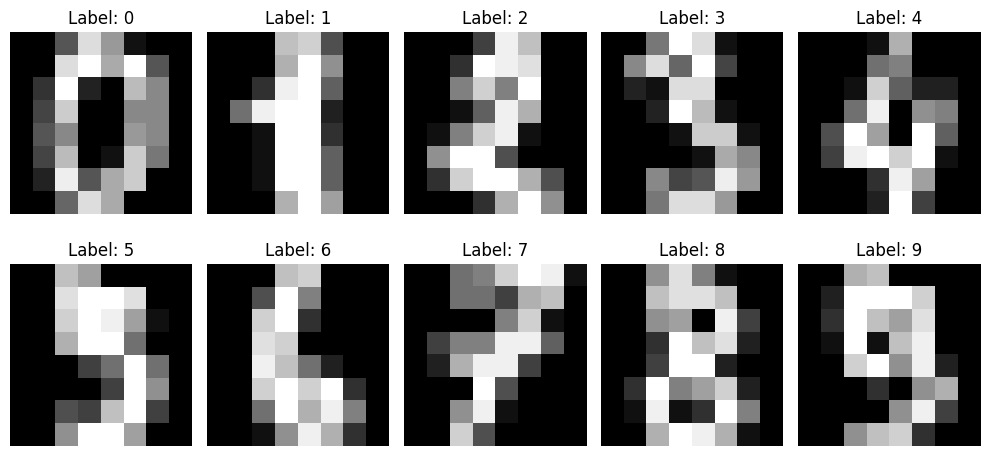

In [261]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [262]:

# Perform K-means clustering using all 64 features
kmeansAll = KMeans(n_clusters=10, random_state=42)  # 10 clusters for 10 digits
kmeansAll.fit(data)

# Mappinh the labels from the clustering to the true labels
labels_pred_all = np.choose(kmeansAll.labels_, np.unique(labels))

# Calculate accuracy
accuracy_all = accuracy_score(labels, labels_pred_all)
print(f'Accuracy (KmeansAll): {accuracy_all:.4f}')


Accuracy (KmeansAll): 0.2543


In [263]:
# Use only the first 8 features (first row)
data_1row = data[:, :8]

# Perform K-means clustering on the first row features
kmeans1row = KMeans(n_clusters=10, random_state=42)
kmeans1row.fit(data_1row)

# Mapping the labels and calculate accuracy
labels_pred_1row = np.choose(kmeans1row.labels_, np.unique(labels))
accuracy_1row = accuracy_score(labels, labels_pred_1row)
print(f'Accuracy (Kmeans1row): {accuracy_1row:.4f}')


Accuracy (Kmeans1row): 0.0562


In [264]:
# Use only the features from the fourth row (columns 24-32)
data_4row = data[:, 24:32]

# Perform K-means clustering on the fourth row features
kmeans4row = KMeans(n_clusters=10, random_state=42)
kmeans4row.fit(data_4row)

# Mapping the labels and calculate accuracy
labels_pred_4row = np.choose(kmeans4row.labels_, np.unique(labels))
accuracy_4row = accuracy_score(labels, labels_pred_4row)
print(f'Accuracy (Kmeans4row): {accuracy_4row:.4f}')


Accuracy (Kmeans4row): 0.1592


In [265]:
# Use only the features from the eighth row (columns 56-64)
data_8row = data[:, 56:]

# Perform K-means clustering on the eighth row features
kmeans8row = KMeans(n_clusters=10, random_state=42)
kmeans8row.fit(data_8row)

# Mapping the labels and calculate accuracy
labels_pred_8row = np.choose(kmeans8row.labels_, np.unique(labels))
accuracy_8row = accuracy_score(labels, labels_pred_8row)
print(f'Accuracy (Kmeans8row): {accuracy_8row:.4f}')


Accuracy (Kmeans8row): 0.0239


4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

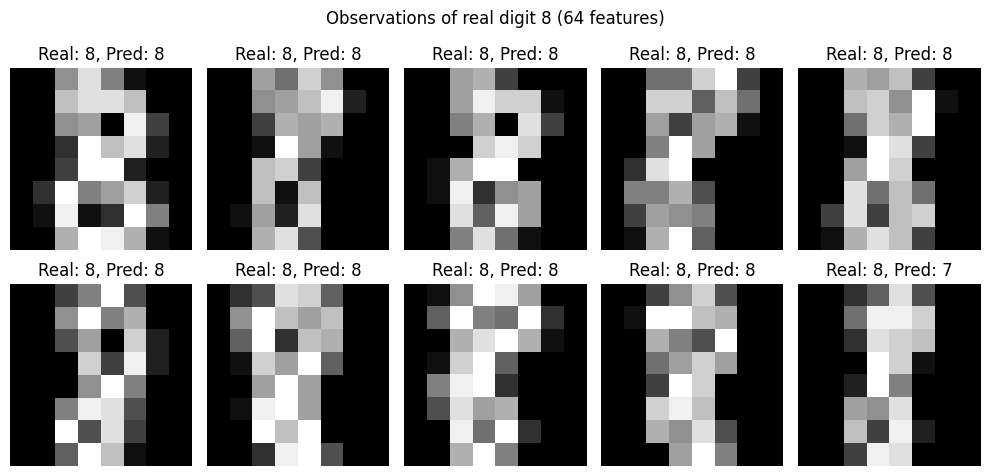

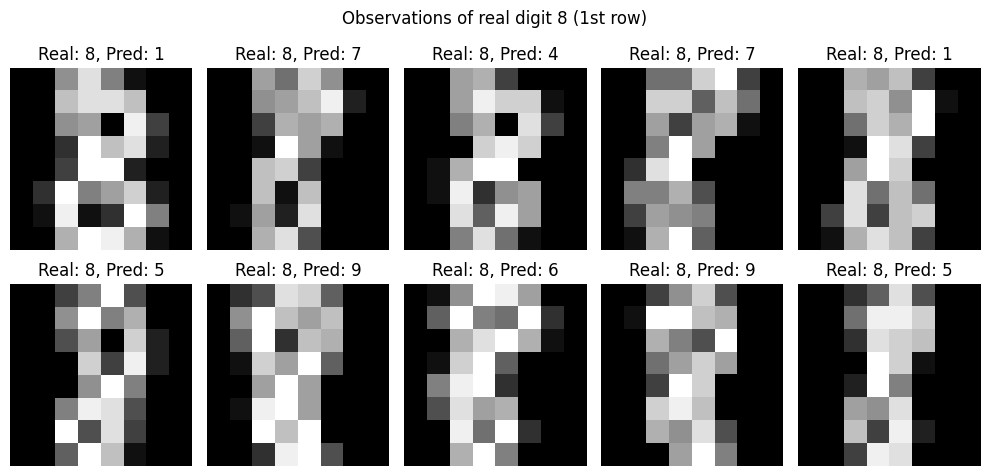

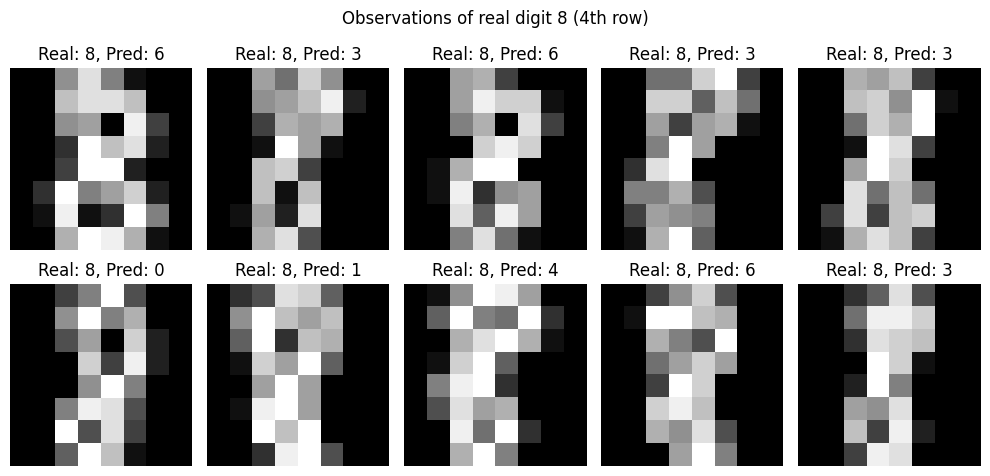

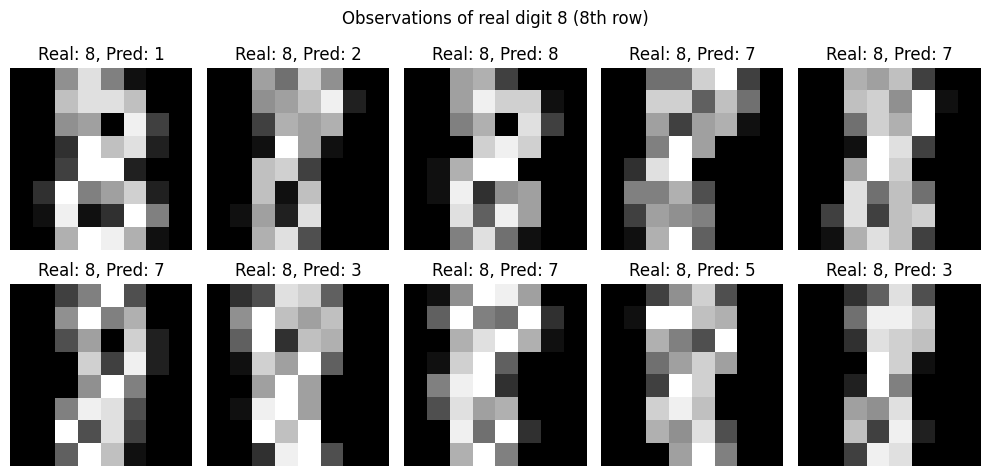

In [266]:

digit = 8
indices = np.where(digits.target == digit)[0]  # finding specific digit in the dataset
predicted_labels = {"64 features":labels_pred_all,"1st row":labels_pred_1row,"4th row":labels_pred_4row,"8th row":labels_pred_8row}
for name, r_labels in predicted_labels.items():
    # plotting
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    fig.suptitle(f'Observations of real digit {digit} ({name})')

    for ax, idx in zip(axes.flat, indices[:10]):  # plot first 10 observations of digit
        ax.imshow(digits.images[idx], cmap='gray')
        ax.set_title(f'Real: {digits.target[idx]}, Pred: {r_labels[idx]}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

5) Compute the Elbow plot

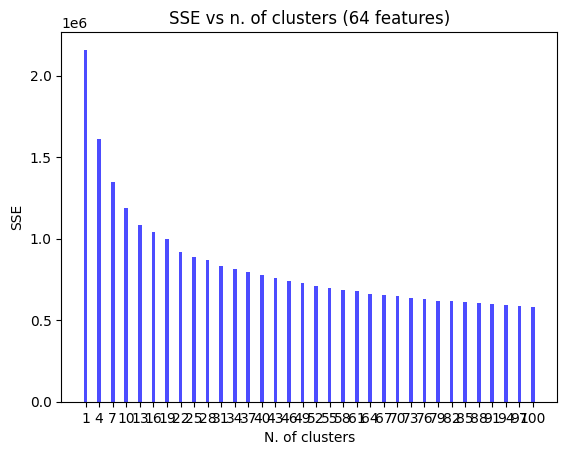

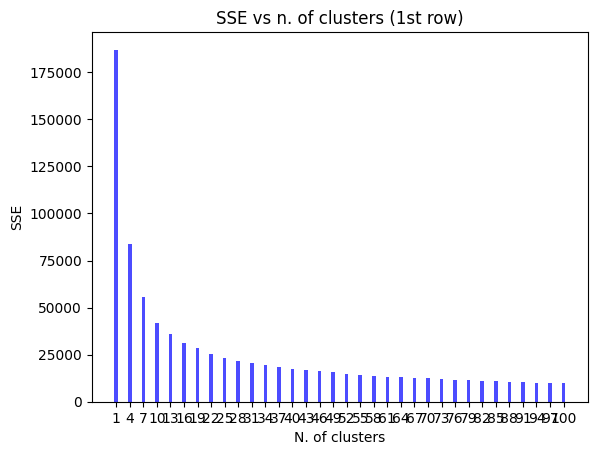

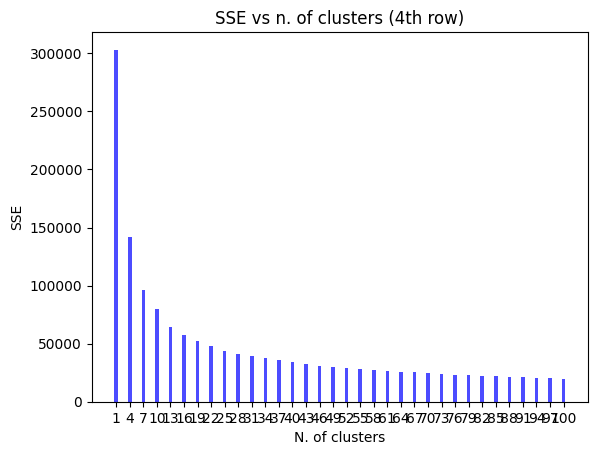

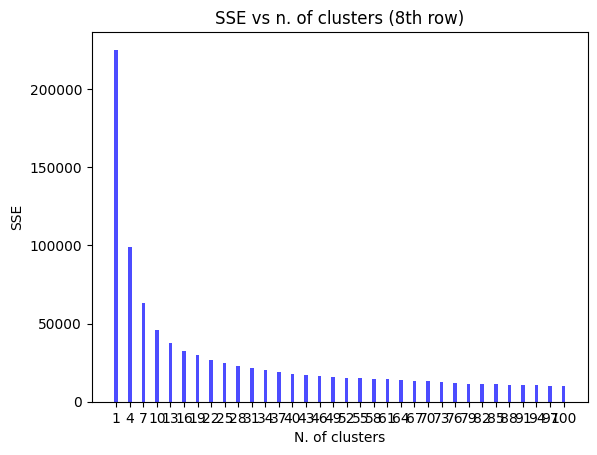

In [267]:
# Elbow plot for every case
data_dict = {"64 features":data,"1st row":data_1row,"4th row":data_4row, "8th row":data_8row}
for name, r_data in data_dict.items():
    sse_k = []
    k = [x for x in range(1,101,3)]
    for i in k:
        kmeans_k = KMeans(n_clusters=i, random_state=42)
        kmeans_k.fit(r_data) # 64 features, 1st row, 4th row and 8th row
        sse = kmeans_k.inertia_
        sse_k.append(sse)
    # Plot sse versus k
    plt.bar(k, sse_k, color='blue', alpha=0.7)

    plt.title(f'SSE vs n. of clusters ({name})')
    plt.xlabel('N. of clusters')
    plt.ylabel('SSE')

    plt.xticks(k) 
    plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response): In general, the clusterization method with kmeans is a bit bad for this data set. The best model (the one with better accuracy) obtained, which was the one trained with the 64 features, had only an accuracy of 0.2543. From the individual rows, the model that achieved the best accuracy (0.1592) was the one trained with the 4th row. This tells us that, from the 1st, 4th and 8th row, the one that tells us the most about the digit is the 4th.

# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

In [268]:
from sklearn.datasets import load_digits

digits = load_digits()
# Extract the data and labels
data = digits.data
labels = digits.target


2) Plot some of the observations  (add in the title the label/digit of that obserbation)

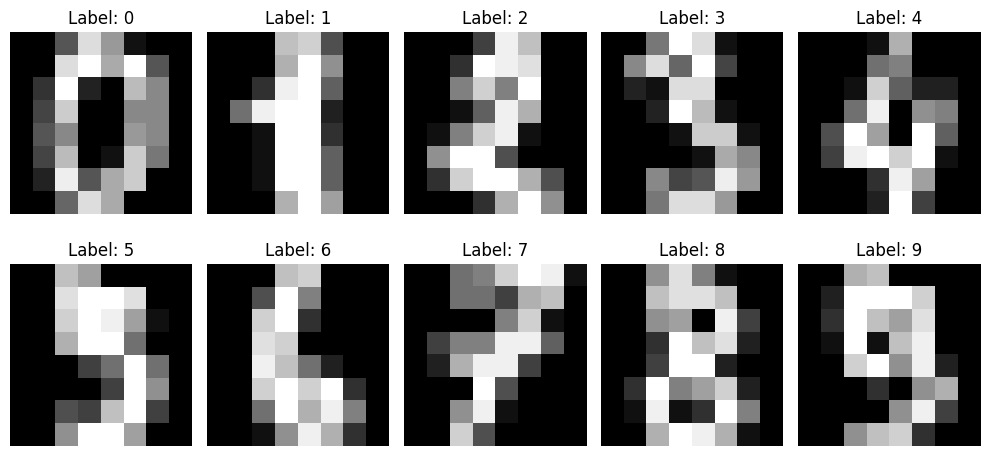

In [269]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

3) Split the dataset in train and test

In [270]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [271]:
# SVM classifier using 64 features
classifierAll = SVC()
classifierAll.fit(X_train, y_train)

# SVM classifier using 1st column
# Obtaining data from the 1st col of the image
X_train_1col = X_train[:, ::8]
X_test_1col = X_test[:, ::8]
# Training the classifier
classifier1col = SVC()
classifier1col.fit(X_train_1col, y_train)

# SVM classifier using 4th column
# Obtaining the data from the 4th col of the image
X_train_4col = X_train[:, 3::8]
X_test_4col = X_test[:, 3::8]
# Training the classifier
classifier4col = SVC()
classifier4col.fit(X_train_4col, y_train)

# SVM classifier using 8th column
# Obtaining the data from the 8th col of the image
X_train_8col = X_train[:, 7::8]
X_test_8col = X_test[:, 7::8]
# Training the classifie
classifier8col = SVC()
classifier8col.fit(X_train_8col,y_train)

SVC()

5) Make predictions (use the test set)

In [272]:
y_pred_all = classifierAll.predict(X_test)
y_pred_1col = classifier1col.predict(X_test_1col)
y_pred_4col = classifier4col.predict(X_test_4col)
y_pred_8col = classifier8col.predict(X_test_8col)


6) Compute performance metrics

In [273]:
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f'Accuracy (ClassifierAll): {accuracy_all:.4f}')

accuracy_1col = accuracy_score(y_test, y_pred_1col)
print(f'Accuracy (Classifier1col): {accuracy_1col:.4f}')

accuracy_4col = accuracy_score(y_test, y_pred_4col)
print(f'Accuracy (Classifier4col): {accuracy_4col:.4f}')

accuracy_8col = accuracy_score(y_test, y_pred_8col)
print(f'Accuracy (Classifier8col): {accuracy_8col:.4f}')

Accuracy (ClassifierAll): 0.9861
Accuracy (Classifier1col): 0.0806
Accuracy (Classifier4col): 0.6667
Accuracy (Classifier8col): 0.1472


7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

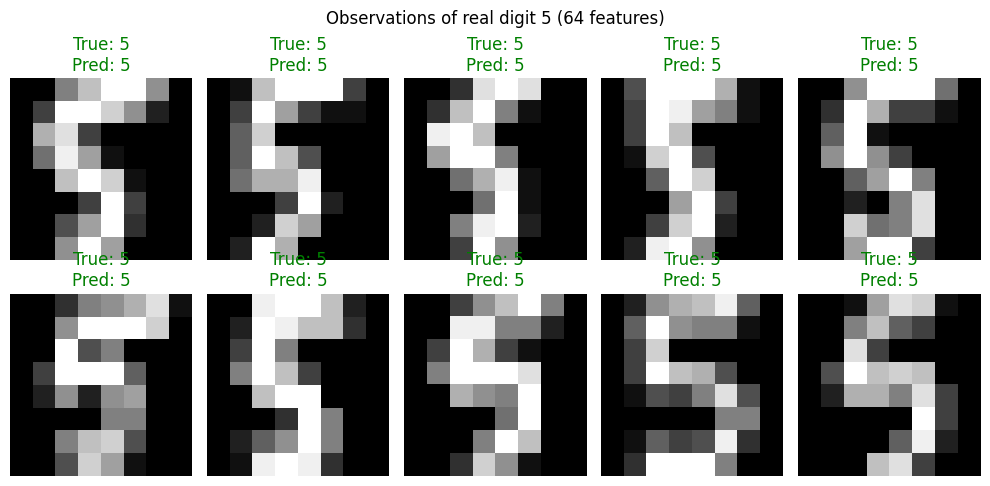

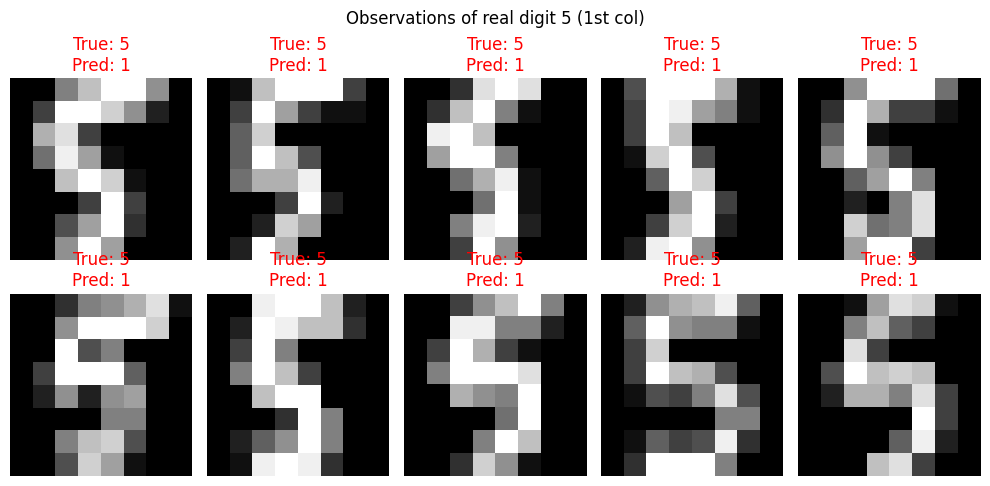

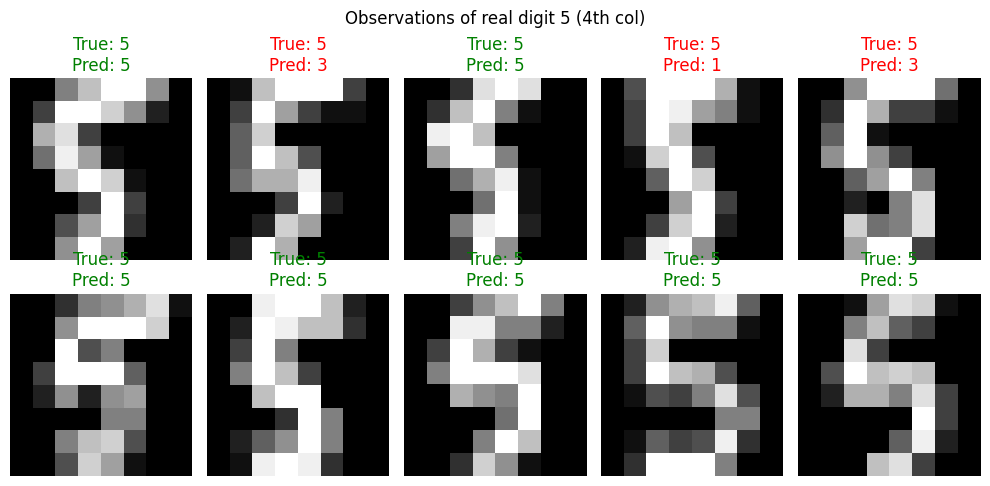

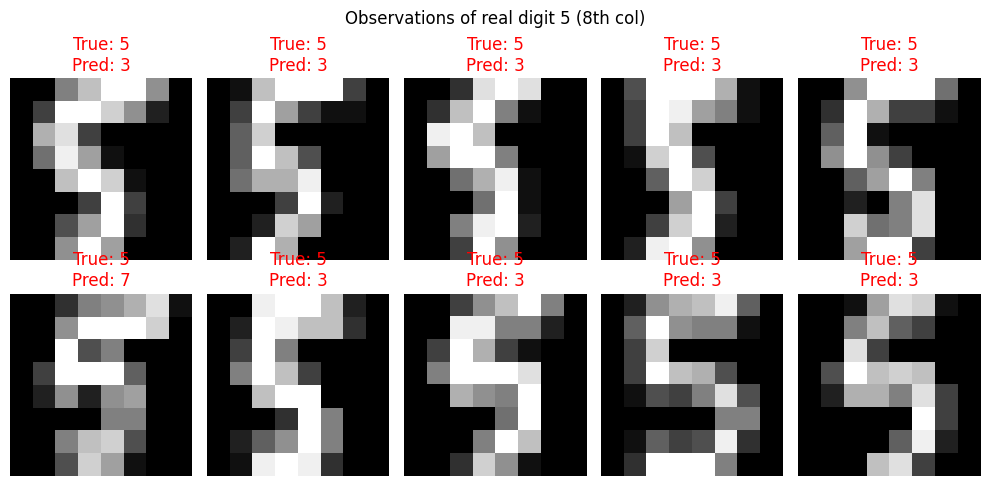

In [274]:
yPredData = {"64 features":y_pred_all,"1st col":y_pred_1col,"4th col":y_pred_4col,"8th col":y_pred_8col}
for name, predicted_digit in yPredData.items():
    target_digit = 5
    # Find indices of samples in the test set that are the target digit
    indices = [i for i, label in enumerate(y_test) if label == target_digit]

    # Limit to first 10 occurrences of the chosen digit for visualization
    indices = indices[:10]

    # Plot the chosen digit samples with true and predicted labels
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    fig.suptitle(f'Observations of real digit {target_digit} ({name})')
    for i, ax in enumerate(axes.ravel()):
        index = indices[i]
        ax.imshow(X_test[index].reshape(8, 8), cmap='gray')
        
        # Get the true and predicted labels
        true_label = y_test[index]
        predicted_label = predicted_digit[index]
        
        # Set the title with the real and estimated labels
        ax.set_title(f"True: {true_label}\nPred: {predicted_label}", 
                    color=("green" if true_label == predicted_label else "red"))
        
        # Hide the axes for cleaner visualization
        ax.axis('off')

    plt.tight_layout()
    plt.show()
    # The code for visualization features, like coloring the subplots titles, was obtained from ChatGPT.

### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response): In this case, the classifier has a very good accuracy score. This might by due to the fact that Support Vector Machine is better at classifing labeled data than kmeans clustering. The best model, which was trained with all the 64 features of the images, had an accuracy score of 0.9861. This makes sense, given that we gave more information to that model. Among the 1st, 4th and 8th columns, the 4th column is the one that gives us mroe information of the digit, because among the models trained with individual column data, the highest accuracy score (0.6667) was achieved with classifier4col.

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Considero que logré adquirir las subcompetencias mencionadas, ya que a lo largo de la semana analicé las relaciones entre las variables pertenecientes a distintos conjuntos de datos con el fin de agruparlos dentro de cierta categoría.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia
**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: Considero que durante la semana aprendí completamente cómo construir modelos bivariados sencillos que me permitan predecir el comportamiento de un conjunto de datos dada una nueva observación.